## Observations and Insights 

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1. Of the mice in the study group, the number of females closely mirrored the number of males.

2. As the tumor increases in size, so does the wieht of the mice.

3. There is a greater number of mice per time point for the Capomulin drug regimen.

4. For those following the Capomulin drug regimen, mice showed a decrease in tumor size over time. 

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
combined_data_df.loc[combined_data_df['Timepoint'] >40, ['Mouse ID','Tumor Volume (mm3)']]

,Mouse ID,Tumor Volume (mm3)
9,k403,22.050126
19,s185,23.343598
29,x401,28.484033
39,m601,28.430964
49,g791,29.128472
...,...,...
1845,y769,68.594745
1855,y865,64.729837
1872,z581,62.754451
1882,z795,65.741070


In [36]:
# Checking the number of mice in the DataFrame.

mice_num = len(combined_data_df["Mouse ID"])
print(mice_num)

1893


In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

combined_data_df['Mouse ID'].value_counts().head()

g989    13
p438    10
m601    10
m957    10
w422    10
Name: Mouse ID, dtype: int64

In [55]:
duplicate_info = combined_data_df[combined_data_df.duplicated()]
duplicate_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_data = combined_data_df.set_index('Mouse ID')
mouse = duplicate_mouse_data.loc['g989', :]
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_extra = duplicate_mouse_data.drop(index = 'g989')
clean_data = drop_extra.reset_index()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
# Checking the number of mice in the clean DataFrame.

len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = clean_data.groupby('Drug Regimen').agg(Mean_TumorVol=('Tumor Volume (mm3)', np.mean), Median_TumorVol=('Tumor Volume (mm3)', np.median), Variance_TumorVol=('Tumor Volume (mm3)', np.var), Standard_Deviation_TumorVol=('Tumor Volume (mm3)', np.std), SEM_TumorVol=('Tumor Volume (mm3)', st.sem)).round(3)

summary_stats

/Users/hannahlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/hannahlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/hannahlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Mean_TumorVol,Median_TumorVol,Variance_TumorVol,Standard_Deviation_TumorVol,SEM_TumorVol
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

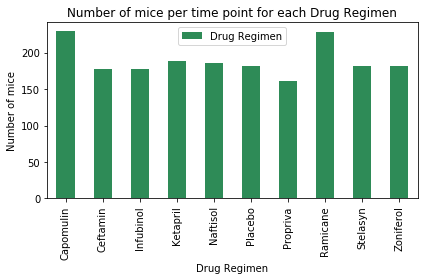

In [100]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

tx_group = combined_data_df.groupby('Drug Regimen')
tx_group_num = pd.DataFrame(tx_group['Drug Regimen'].count())
num_chart = tx_group_num.plot(kind='bar', title="Number of mice per time point for each Drug Regimen", color="seagreen")

num_chart.set_xlabel("Drug Regimen")
num_chart.set_ylabel("Number of mice")
plt.tight_layout()

plt.savefig("Figures/PymaceuticalsBarChart.png")
plt.show()

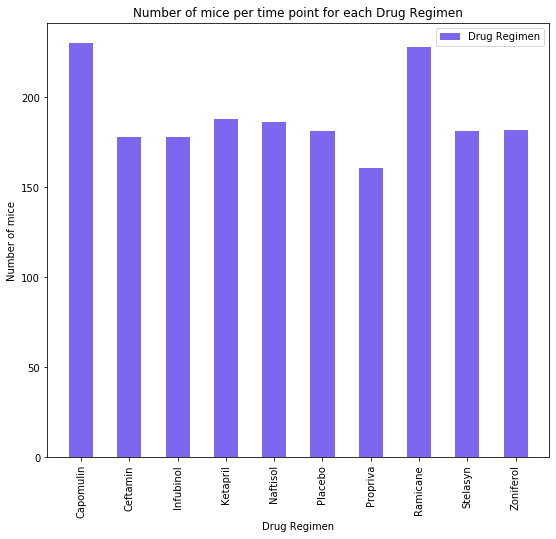

In [101]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(tx_group_num))
ticks = [value for value in x_axis]

plt.figure(figsize=(9,8))
plt.bar(x_axis, tx_group_num["Drug Regimen"], color='mediumslateblue', align="center", width = 0.5)
plt.xticks(ticks, list(tx_group_num.index), rotation="vertical")

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(tx_group_num["Drug Regimen"])*1.05)
plt.title("Number of mice per time point for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

plt.savefig("Figures/PymaceuticalsPyplotBarChart.png")
plt.show()

## Pie Plots

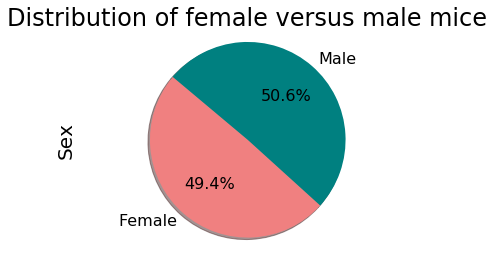

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genders = combined_data_df.groupby('Sex')
gender_count = pd.DataFrame(genders['Sex'].count())

gender_count.plot(kind='pie', y='Sex', title="Distribution of female versus male mice", startangle=140, autopct='%1.1f%%', shadow=True, fontsize=16, colors =["lightcoral","teal"],legend =False)
plt.axis("equal")
plt.savefig("Figures/PymaceuticalsPiePlot.png")
plt.show()

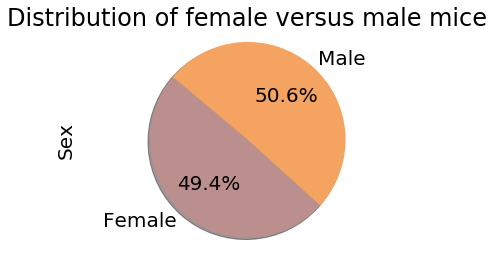

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders_list = list(gender_count.index.values)

num_genders = gender_count['Sex']
colors = ["rosybrown", "sandybrown"]

plt.pie(num_genders, labels=genders_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 20
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("Figures/PymaceuticalsPyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [149]:
combined_data_df.loc[combined_data_df['Drug Regimen']=="Capomulin"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [177]:
final_tumor = clean_data.groupby(['Mouse ID']).max()
final_tumor = final_tumor.reset_index()

merged_data = final_tumor[['Mouse ID', 'Timepoint']].merge(clean_data, on=['Mouse ID', 'Timepoint'], how='left')

capomulin = merged_data.loc[merged_data['Drug Regimen']=="Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data['Drug Regimen']=="Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data['Drug Regimen']=="Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data['Drug Regimen']=="Ceftamin"]['Tumor Volume (mm3)']


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [163]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

capomulin_quartiles = capomulin.quantile([0.25, 0.5, 0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*iqr)

print(f"The interquartile range of Capomulin is: {round(iqr, 2)}\n")
print(f"Potential outliers for Capomulin:\n{capomulin.loc[(capomulin < capomulin_lower_bound) | (capomulin > capomulin_upper_bound)]}")

The interquartile range of Capomulin is: 7.78

Potential outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


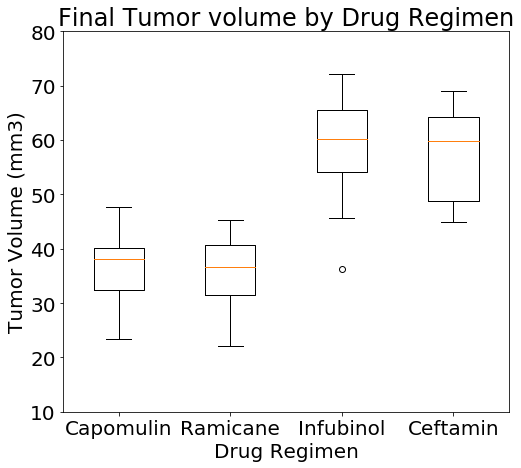

In [231]:
#Generate boxplot

four_regimen = merged_data[merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_regimen = four_regimen.sort_values(["Timepoint"], ascending=True)
four_regimen_data = four_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
four_regimen_sort = four_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
four_regimen_sort.head()

four_regimen_df = four_regimen_sort.to_frame()

drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

final_df = four_regimen_df.reset_index()
tumor_vol_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(tuple)
tumor_vol_list_df = pd.DataFrame(tumor_vol_lists)
tumor_vol_list_df = tumor_vol_list_df.reindex(drug_list)
tumor_volumes = [vol for vol in tumor_vol_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=drug_list)

plt.title('Final Tumor volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(10, 80)

plt.savefig("Figures/PymaceuticalsBoxPlot.png")
plt.show()


## Line and Scatter Plots

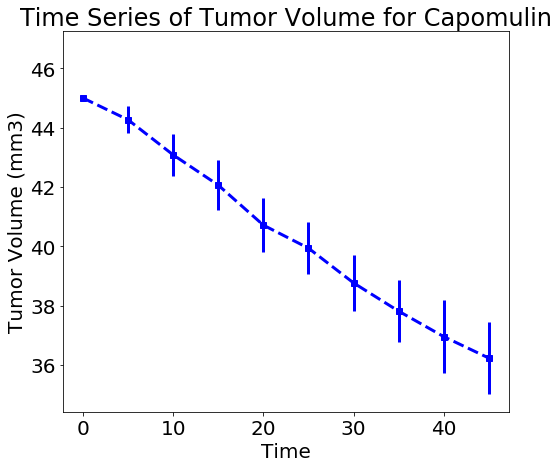

In [123]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
capomulin_timept_tumor = capomulin_data.groupby(['Timepoint']).agg(Mean_Tumor_Volume=('Tumor Volume (mm3)', np.mean), SEM_Tumor_Volume=('Tumor Volume (mm3)', st.sem)).round(3)

time_series = list(capomulin_timept_tumor.index.values)

plt.errorbar(time_series, capomulin_timept_tumor['Mean_Tumor_Volume'], yerr=capomulin_timept_tumor['SEM_Tumor_Volume'], label="Time Series of Tumor Volume for Capomulin", fmt="bs--", linewidth=3)

plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")


plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(capomulin_timept_tumor['Mean_Tumor_Volume'])*0.95, max(capomulin_timept_tumor['Mean_Tumor_Volume'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

plt.savefig("Figures/PymaceuticalsLinePlot.png")

plt.show()

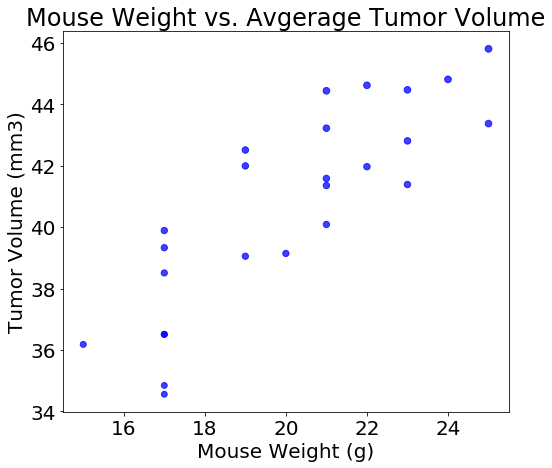

In [133]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_id = capomulin_data.groupby(['Mouse ID']).agg(Weight=('Weight (g)', np.mean), Mean_Tumor_Volume=('Tumor Volume (mm3)', np.mean)).round(3)

plt.scatter(capomulin_id['Weight'], capomulin_id['Mean_Tumor_Volume'], marker='o', facecolors='blue', s=capomulin_id['Mean_Tumor_Volume'], alpha=.75)

plt.title("Mouse Weight vs. Avgerage Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("Figures/PymaceuticalsScatterPlot.png")

plt.show()

## Correlation and Regression

In [138]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coeff = st.pearsonr(capomulin_id['Weight'], capomulin_id['Mean_Tumor_Volume'])
print(f"The correlation coefficient is {correlation_coeff[0]}")

The correlation coefficient is 0.841946102026108


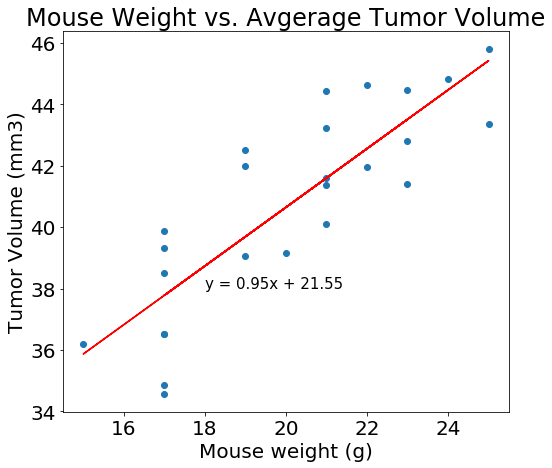

In [232]:
x_values = capomulin_id['Weight']
y_values = capomulin_id['Mean_Tumor_Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="black")
plt.title("Mouse Weight vs. Avgerage Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("Figures/PymaceuticalsLinearRegression.png")

plt.show()